## Projeto: Análise de Dados com Python

Objetivo: Armazenar os gastos (até o momento) por deputado federal.

1. Obter os dados
2. Efetuar os ajustes necessários
3. Armazenar no sqlite

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import sqlite3
import requests

In [2]:
# Verificando o link da API
url = "https://dadosabertos.camara.leg.br/api/v2/deputados?ordem=ASC&ordenarPor=nome"
resultado = requests.get(url)

In [3]:
# Verificando o conteúdo da resposta
resultado.json()

{'dados': [{'id': 204379,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204379',
   'nome': 'Acácio Favacho',
   'siglaPartido': 'MDB',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/36899',
   'siglaUf': 'AP',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204379.jpg',
   'email': 'dep.acaciofavacho@camara.leg.br'},
  {'id': 220714,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/220714',
   'nome': 'Adail Filho',
   'siglaPartido': 'REPUBLICANOS',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37908',
   'siglaUf': 'AM',
   'idLegislatura': 57,
   'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/220714.jpg',
   'email': 'dep.adailfilho@camara.leg.br'},
  {'id': 221328,
   'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/221328',
   'nome': 'Adilson Barroso',
   'siglaPartido': 'PL',
   'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/

In [4]:
# Criando um dataframe com os dados
deputados = pd.DataFrame(resultado.json()['dados'])

In [5]:
# Verificando o conteúdo do dataframe
deputados.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
1,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
2,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [6]:
# Verificando o tamanho do dataframe
deputados.shape

(513, 9)

In [11]:
# Criando uma lista para armazenar os dados de gastos
gastos = []

# Iterando sobre os deputados
for id in deputados.id:
    # Obtendo os dados de gastos do deputado
    url_despesa = f"https://dadosabertos.camara.leg.br/api/v2/deputados/{id}/despesas?ordem=ASC&ordenarPor=ano"
    resultado = requests.get(url_despesa)
    
    # Criando um Datframe e adicionando os dados à lista
    gasto = pd.DataFrame(resultado.json()['dados'])
    gasto['id'] = id
    gastos.append(gasto)

In [12]:
# Verificando o tamanho da lista de DataFrames
len(gastos)

513

In [13]:
# Verificando o tamanho do primeiro DataFrame
len(gastos[0])

15

In [14]:
# Verificando o conteúdo do primeiro DataFrame
gastos[0]

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2024,11,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837655,Nota Fiscal,0,2024-11-06T00:00:00,1735,750.00,https://www.camara.leg.br/cota-parlamentar/doc...,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,,2092841,0,204379
1,2024,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7838902,Nota Fiscal,0,2024-12-03T00:00:00,1806,750.00,https://www.camara.leg.br/cota-parlamentar/doc...,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,,2093592,0,204379
2,2024,10,COMBUSTÍVEIS E LUBRIFICANTES.,7825377,Nota Fiscal Eletrônica,4,2024-10-18T14:38:21,426723,335.84,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,335.84,0.0,,2086265,0,204379
3,2024,11,COMBUSTÍVEIS E LUBRIFICANTES.,7833232,Nota Fiscal Eletrônica,4,2024-11-12T14:48:43,432734,333.12,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,333.12,0.0,,2090590,0,204379
4,2024,11,COMBUSTÍVEIS E LUBRIFICANTES.,7833238,Nota Fiscal Eletrônica,4,2024-11-14T17:52:07,433490,300.00,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,300.00,0.0,,2090590,0,204379
5,2024,11,COMBUSTÍVEIS E LUBRIFICANTES.,7833235,Nota Fiscal Eletrônica,4,2024-11-19T19:56:23,434554,330.30,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,330.30,0.0,,2090590,0,204379
6,2024,11,COMBUSTÍVEIS E LUBRIFICANTES.,7839485,Nota Fiscal Eletrônica,4,2024-11-22T14:59:39,435276,400.00,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,400.00,0.0,,2093974,0,204379
7,2024,12,COMBUSTÍVEIS E LUBRIFICANTES.,7850706,Nota Fiscal Eletrônica,4,2024-12-18T09:35:16,441145,329.11,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,329.11,0.0,,2100003,0,204379
8,2024,10,COMBUSTÍVEIS E LUBRIFICANTES.,7825409,Nota Fiscal Eletrônica,4,2024-10-16T15:25:53,465584,345.20,http://www.camara.leg.br/cota-parlamentar/nota...,072 - 403 SUL - CASCOL COMBUSTIVEIS PARA VEICU...,00306597007290,345.20,0.0,,2086263,0,204379
9,2024,11,COMBUSTÍVEIS E LUBRIFICANTES.,7839491,Nota Fiscal Eletrônica,4,2024-11-20T20:04:24,1029524,300.00,http://www.camara.leg.br/cota-parlamentar/nota...,076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEI...,00306597007614,300.00,0.0,,2093974,0,204379


## Transformação

In [20]:
# Concatenando os dados de gastos em um único DataFrame
total = pd.concat(gastos)

In [21]:
# Verificando o tamanho do DataFrame
total.shape

(7616, 18)

In [22]:
# Verificando o conteúdo do DataFrame
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837655.0,Nota Fiscal,0.0,2024-11-06T00:00:00,1735,750.00,https://www.camara.leg.br/cota-parlamentar/doc...,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,,2092841.0,0.0,204379
1,2024.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7838902.0,Nota Fiscal,0.0,2024-12-03T00:00:00,1806,750.00,https://www.camara.leg.br/cota-parlamentar/doc...,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,,2093592.0,0.0,204379
2,2024.0,10.0,COMBUSTÍVEIS E LUBRIFICANTES.,7825377.0,Nota Fiscal Eletrônica,4.0,2024-10-18T14:38:21,426723,335.84,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,335.84,0.0,,2086265.0,0.0,204379
3,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833232.0,Nota Fiscal Eletrônica,4.0,2024-11-12T14:48:43,432734,333.12,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,333.12,0.0,,2090590.0,0.0,204379
4,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833238.0,Nota Fiscal Eletrônica,4.0,2024-11-14T17:52:07,433490,300.00,http://www.camara.leg.br/cota-parlamentar/nota...,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,300.00,0.0,,2090590.0,0.0,204379


In [23]:
# Verificando o conteúdo do DataFrame
total.sample(3)

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,urlDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
14,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7867532.0,Nota Fiscal Eletrônica,4.0,2024-11-25T00:00:00,5976,1423.00,http://www.camara.leg.br/cota-parlamentar/nota...,ROAD COMERCIO E SERVIÇOS LTDA,05555440000129,1187.00,236.0,,2109652.0,0.0,220609
14,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7829459.0,Recibos/Outros,1.0,2024-11-01T00:00:00,75058,6192.12,https://www.camara.leg.br/cota-parlamentar/doc...,PLANALTO CENTRAL IMOVEIS LTDA,00581058000176,6192.12,0.0,,2088531.0,0.0,204374
13,2024.0,12.0,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7839859.0,Nota Fiscal,0.0,2024-12-04T00:00:00,37,1500.00,https://www.camara.leg.br/cota-parlamentar/doc...,RAIMUNDO PEREIRA MAIA NETO,36227857000196,1074.16,0.0,,2094268.0,1.0,204481


In [24]:
# Valores ausentes?
total.isnull().sum()

ano                    0
mes                    0
tipoDespesa            0
codDocumento           0
tipoDocumento          0
codTipoDocumento       0
dataDocumento          0
numDocumento           0
valorDocumento         0
urlDocumento         272
nomeFornecedor         0
cnpjCpfFornecedor      0
valorLiquido           0
valorGlosa             0
numRessarcimento       0
codLote                0
parcela                0
id                     0
dtype: int64

In [25]:
# Removendo a coluna urlDocumento
del[total['urlDocumento']]

In [26]:
# Verificando o conteúdo do DataFrame
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,numRessarcimento,codLote,parcela,id
0,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837655.0,Nota Fiscal,0.0,2024-11-06T00:00:00,1735,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,,2092841.0,0.0,204379
1,2024.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7838902.0,Nota Fiscal,0.0,2024-12-03T00:00:00,1806,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,,2093592.0,0.0,204379
2,2024.0,10.0,COMBUSTÍVEIS E LUBRIFICANTES.,7825377.0,Nota Fiscal Eletrônica,4.0,2024-10-18T14:38:21,426723,335.84,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,335.84,0.0,,2086265.0,0.0,204379
3,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833232.0,Nota Fiscal Eletrônica,4.0,2024-11-12T14:48:43,432734,333.12,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,333.12,0.0,,2090590.0,0.0,204379
4,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833238.0,Nota Fiscal Eletrônica,4.0,2024-11-14T17:52:07,433490,300.00,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,300.00,0.0,,2090590.0,0.0,204379


In [27]:
# Verificando o valor total de ressarcimento
total.numRessarcimento.value_counts()

numRessarcimento
     7404
0     212
Name: count, dtype: int64

In [28]:
# Removendo a coluna numRessarcimento
del[total['numRessarcimento']]

In [29]:
# Verificando o conteúdo do DataFrame
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,dataDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837655.0,Nota Fiscal,0.0,2024-11-06T00:00:00,1735,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,2092841.0,0.0,204379
1,2024.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7838902.0,Nota Fiscal,0.0,2024-12-03T00:00:00,1806,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,2093592.0,0.0,204379
2,2024.0,10.0,COMBUSTÍVEIS E LUBRIFICANTES.,7825377.0,Nota Fiscal Eletrônica,4.0,2024-10-18T14:38:21,426723,335.84,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,335.84,0.0,2086265.0,0.0,204379
3,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833232.0,Nota Fiscal Eletrônica,4.0,2024-11-12T14:48:43,432734,333.12,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,333.12,0.0,2090590.0,0.0,204379
4,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833238.0,Nota Fiscal Eletrônica,4.0,2024-11-14T17:52:07,433490,300.00,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,300.00,0.0,2090590.0,0.0,204379


In [30]:
# Verificando o valor total de dataDocumento
total.dataDocumento.value_counts()

dataDocumento
2024-11-01T00:00:00    213
2024-12-02T00:00:00    180
2024-12-10T00:00:00    166
2024-11-05T00:00:00    142
2024-12-03T00:00:00    139
                      ... 
2024-10-22T09:20:07      1
2024-11-23T08:16:28      1
2024-11-03T08:10:42      1
2024-12-27T15:00:22      1
2024-12-04T00:15:13      1
Name: count, Length: 2365, dtype: int64

In [31]:
# Removendo a coluna dataDocumento
del[total['dataDocumento']]

In [32]:
# Verificando o conteúdo do DataFrame
total.head()

,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837655.0,Nota Fiscal,0.0,1735,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,2092841.0,0.0,204379
1,2024.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7838902.0,Nota Fiscal,0.0,1806,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,2093592.0,0.0,204379
2,2024.0,10.0,COMBUSTÍVEIS E LUBRIFICANTES.,7825377.0,Nota Fiscal Eletrônica,4.0,426723,335.84,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,335.84,0.0,2086265.0,0.0,204379
3,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833232.0,Nota Fiscal Eletrônica,4.0,432734,333.12,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,333.12,0.0,2090590.0,0.0,204379
4,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833238.0,Nota Fiscal Eletrônica,4.0,433490,300.00,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,300.00,0.0,2090590.0,0.0,204379


In [33]:
# Verificando os dados e tirando os dados duplicados
print(total.shape)
total.drop_duplicates()
print(total.shape)

(7616, 15)
(7616, 15)


In [34]:
# Verificando os tipos de dados
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7616 entries, 0 to 14
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ano                7616 non-null   float64
 1   mes                7616 non-null   float64
 2   tipoDespesa        7616 non-null   object 
 3   codDocumento       7616 non-null   float64
 4   tipoDocumento      7616 non-null   object 
 5   codTipoDocumento   7616 non-null   float64
 6   numDocumento       7616 non-null   object 
 7   valorDocumento     7616 non-null   float64
 8   nomeFornecedor     7616 non-null   object 
 9   cnpjCpfFornecedor  7616 non-null   object 
 10  valorLiquido       7616 non-null   float64
 11  valorGlosa         7616 non-null   float64
 12  codLote            7616 non-null   float64
 13  parcela            7616 non-null   float64
 14  id                 7616 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 952.0+ KB


In [35]:
# Verificando as informações do DataFrame
total.describe()

,ano,mes,codDocumento,codTipoDocumento,valorDocumento,valorLiquido,valorGlosa,codLote,parcela,id
count,7616.000000,7616.000000,7.616000e+03,7616.000000,7616.000000,7616.000000,7616.000000,7.616000e+03,7616.000000,7616.000000
mean,2024.038340,10.696560,7.630128e+06,1.779674,2059.127957,2017.841104,13.086434,2.036271e+06,0.006565,181423.838892
std,0.192029,1.883256,1.242057e+06,1.820590,6252.163256,6105.300554,198.587810,3.446721e+05,0.080764,49626.845493
min,2024.000000,1.000000,2.651650e+05,0.000000,-3028.100000,-3028.100000,0.000000,0.000000e+00,0.000000,62881.000000
25%,2024.000000,10.000000,7.828882e+06,0.000000,200.000000,200.000000,0.000000,2.088355e+06,0.000000,160575.000000
50%,2024.000000,11.000000,7.838794e+06,1.000000,345.670000,342.865000,0.000000,2.093650e+06,0.000000,204457.000000
75%,2024.000000,12.000000,7.848552e+06,4.000000,1500.000000,1490.070000,0.000000,2.098966e+06,0.000000,220591.000000
max,2025.000000,12.000000,7.897171e+06,4.000000,209948.000000,184428.000000,9367.960000,2.126207e+06,1.000000,231911.000000


In [36]:
# Verificando os dados da coluna nomeFornecedor
total.nomeFornecedor.value_counts()

nomeFornecedor
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA      186
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    178
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA                   145
AUTO POSTO CINCO ESTRELAS LTDA                              138
AUTO POSTO 303 NORTE LTDA                                   106
                                                           ... 
COMERCIO DE COMBUSTIVEIS COELHO NEVES LTDA                    1
COMERCIO DE COMBUSTIVEIS ALEX LTDA                            1
COMBUSTIVEIS MAVERICKS LTDA                                   1
AUTO POSTO MIRANTE LTDA                                       1
ABAST E GARAGEM SS LTDA                                       1
Name: count, Length: 2172, dtype: int64

In [37]:
# Verificando os dados da coluna nomeFornecedor
[fornecedor for fornecedor in total.nomeFornecedor]

['AMORETTO CAFES EXPRESSO LTDA',
 'AMORETTO CAFES EXPRESSO LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '072 - 403 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 

In [38]:
# Verificando os dados da coluna nomeFornecedor
[str(fornecedor).upper().replace('S.A', 'S.A').replace('S/A', 'S.A') for fornecedor in total.nomeFornecedor]

['AMORETTO CAFES EXPRESSO LTDA',
 'AMORETTO CAFES EXPRESSO LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '072 - 403 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 'AUTO POSTO 303 NORTE LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 '076 - MELHOR 10 - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA',
 

In [39]:
# Verificando os dados da coluna nomeFornecedor
total.nomeFornecedor = [str(fornecedor).upper().replace('S.A', 'S.A').replace('S/A', 'S.A') for fornecedor in total.nomeFornecedor]

In [40]:
# Verificando os dados da coluna nomeFornecedor
total.nomeFornecedor.value_counts()

nomeFornecedor
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA      186
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    178
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA                   145
AUTO POSTO CINCO ESTRELAS LTDA                              138
CLARO NXT TELECOMUNICAÇÕES S.A                              113
                                                           ... 
COMERCIO DE COMBUSTIVEIS COELHO NEVES LTDA                    1
COMERCIO DE COMBUSTIVEIS ALEX LTDA                            1
COMBUSTIVEIS MAVERICKS LTDA                                   1
AUTO POSTO MIRANTE LTDA                                       1
ABAST E GARAGEM SS LTDA                                       1
Name: count, Length: 2161, dtype: int64

## Carga

In [48]:
# Criando a conexão com o banco de dados
from sqlalchemy import create_engine
engine = create_engine('sqlite:///dados_aberto.db')

In [49]:
# Criando a tabela deputados
deputados.to_sql('deputados', con=engine)


513

In [50]:
total.to_sql('despesas_total', engine)

7616

## Análise

In [51]:
total = pd.read_sql('SELECT * FROM despesas_total', engine)

In [52]:
# Verificando o tamanho do DataFrame
total.head()

,index,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,cnpjCpfFornecedor,valorLiquido,valorGlosa,codLote,parcela,id
0,0,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837655.0,Nota Fiscal,0.0,1735,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,2092841.0,0.0,204379
1,1,2024.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7838902.0,Nota Fiscal,0.0,1806,750.00,AMORETTO CAFES EXPRESSO LTDA,08532429000131,750.00,0.0,2093592.0,0.0,204379
2,2,2024.0,10.0,COMBUSTÍVEIS E LUBRIFICANTES.,7825377.0,Nota Fiscal Eletrônica,4.0,426723,335.84,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,335.84,0.0,2086265.0,0.0,204379
3,3,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833232.0,Nota Fiscal Eletrônica,4.0,432734,333.12,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,333.12,0.0,2090590.0,0.0,204379
4,4,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833238.0,Nota Fiscal Eletrônica,4.0,433490,300.00,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,00306597003112,300.00,0.0,2090590.0,0.0,204379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7611,10,2024.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837826.0,Recibos/Outros,1.0,sem numero,1944.37,N P IMOVEIS LTDA,89176887000187,1944.37,0.0,2096876.0,0.0,220552
7612,11,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7829223.0,Recibos/Outros,1.0,Sem número.,1944.37,N P IMOVEIS LTDA,89176887000187,1944.37,0.0,2088423.0,0.0,220552
7613,12,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7832709.0,Nota Fiscal Eletrônica,4.0,352786,100.00,069 - PENISULA - CASCOL COMBUSTIVEIS PARA VEIC...,00306597006995,100.00,0.0,2090302.0,0.0,220552
7614,13,2024.0,12.0,COMBUSTÍVEIS E LUBRIFICANTES.,7846925.0,Nota Fiscal Eletrônica,4.0,912726,174.97,ABAST E GARAGEM SS LTDA,90212093000100,174.97,0.0,2097989.0,0.0,220552


In [53]:
deputados = pd.read_sql('SELECT * FROM deputados', engine)

In [54]:
# Verificando o tamanho do DataFrame
deputados.head()

,index,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
1,1,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
2,2,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
3,3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br
4,4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,NOVO,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adrianaventura@camara.leg.br


In [55]:
# Fazendo o merge entre os DataFrames
total = total.merge(deputados, on=['id'])

In [56]:
# Verificando o tamanho do DataFrame
total.head()

,index_x,ano,mes,tipoDespesa,codDocumento,tipoDocumento,codTipoDocumento,numDocumento,valorDocumento,nomeFornecedor,...,id,index_y,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,0,2024.0,11.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7837655.0,Nota Fiscal,0.0,1735,750.00,AMORETTO CAFES EXPRESSO LTDA,...,204379,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
1,1,2024.0,12.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7838902.0,Nota Fiscal,0.0,1806,750.00,AMORETTO CAFES EXPRESSO LTDA,...,204379,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,2,2024.0,10.0,COMBUSTÍVEIS E LUBRIFICANTES.,7825377.0,Nota Fiscal Eletrônica,4.0,426723,335.84,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,...,204379,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
3,3,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833232.0,Nota Fiscal Eletrônica,4.0,432734,333.12,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,...,204379,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
4,4,2024.0,11.0,COMBUSTÍVEIS E LUBRIFICANTES.,7833238.0,Nota Fiscal Eletrônica,4.0,433490,300.00,031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEI...,...,204379,0,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br


In [57]:
gastos_deputados = total.groupby(['nome']).sum()[['valorDocumento', 'valorLiquido']]

In [58]:
# Verificando o tamanho do DataFrame
gastos_deputados.head()

,valorDocumento,valorLiquido
nome,,
AJ Albuquerque,5381.73,5381.73
Acácio Favacho,5623.43,5623.43
Adail Filho,2563.46,2563.46
Adilson Barroso,14883.39,14870.02
Adolfo Viana,8073.75,8073.75


In [59]:
gastos_deputados.sort_values(by='valorDocumento', ascending=False)

,valorDocumento,valorLiquido
nome,,
Pr. Marco Feliciano,285678.90,283257.15
Professor Alcides,261883.79,255339.26
Duda Ramos,241190.45,214570.45
Gustinho Ribeiro,231694.68,231694.68
Silas Câmara,226282.07,226282.07
...,...,...
Alice Portugal,2317.91,2317.91
Isnaldo Bulhões Jr.,2280.02,2280.02
Robério Monteiro,1853.00,1853.00


In [60]:
gastos_deputados.head(10)

,valorDocumento,valorLiquido
nome,,
AJ Albuquerque,5381.73,5381.73
Acácio Favacho,5623.43,5623.43
Adail Filho,2563.46,2563.46
Adilson Barroso,14883.39,14870.02
Adolfo Viana,8073.75,8073.75
Adriana Ventura,10557.95,10557.95
Adriano do Baldy,24553.31,24533.96
Afonso Hamm,8482.57,8448.49
Afonso Motta,13453.74,13241.24


In [61]:
gastos_deputados.tail(10)

,valorDocumento,valorLiquido
nome,,
Zezinho Barbary,10789.23,10789.23
Zucco,19396.39,19384.39
Zé Adriano,32251.69,32094.29
Zé Haroldo Cathedral,25950.83,25822.73
Zé Neto,12778.72,12769.26
Zé Silva,8873.59,8873.59
Zé Trovão,34291.84,34286.40
Zé Vitor,2816.03,2816.03
Átila Lins,72424.35,72347.74


In [62]:
%matplotlib inline

In [63]:
total.nomeFornecedor.value_counts()

nomeFornecedor
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA      186
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    178
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA                   145
AUTO POSTO CINCO ESTRELAS LTDA                              138
CLARO NXT TELECOMUNICAÇÕES S.A                              113
                                                           ... 
COMERCIO DE COMBUSTIVEIS COELHO NEVES LTDA                    1
COMERCIO DE COMBUSTIVEIS ALEX LTDA                            1
COMBUSTIVEIS MAVERICKS LTDA                                   1
AUTO POSTO MIRANTE LTDA                                       1
ABAST E GARAGEM SS LTDA                                       1
Name: count, Length: 2161, dtype: int64

In [64]:
total.nomeFornecedor.value_counts()[:10]

nomeFornecedor
063 - 311 SUL - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA      186
031 - 302 NORTE - CASCOL COMBUSTIVEIS PARA VEICULOS LTDA    178
WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA                   145
AUTO POSTO CINCO ESTRELAS LTDA                              138
CLARO NXT TELECOMUNICAÇÕES S.A                              113
AUTO POSTO 303 NORTE LTDA                                   106
CEMIG DISTRIBUIÇÃO S.A.                                      95
BROAD BRASIL LTDA                                            87
AMORETTO CAFES EXPRESSO LTDA                                 86
TAM                                                          83
Name: count, dtype: int64

<Axes: xlabel='nomeFornecedor'>

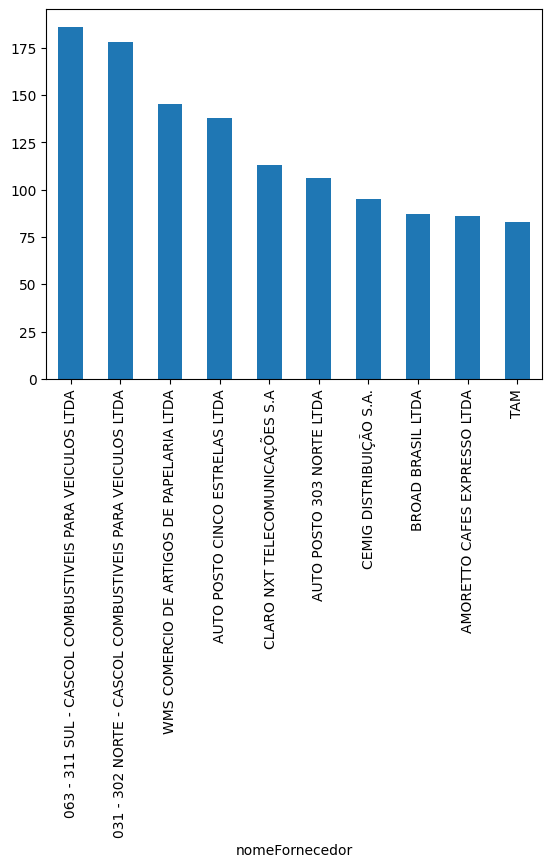

In [65]:
total.nomeFornecedor.value_counts()[:10].plot(kind='bar')